# MINI SVM USING KERNELS

# Aakanksha D
# 18BTRCR001
# Ds 5th sem

# importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# loading dataset

In [2]:
df=pd.read_csv('framingham.csv')

In [3]:
df.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
df.shape

(4238, 16)

In [6]:
df=df.drop(['education'],axis=1)

# checking missing and null values

In [8]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [9]:
df=df.dropna()
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [10]:
df.describe()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,0.445185,49.578821,0.488397,9.005335,0.030408,0.005601,0.311816,0.027207,236.952787,132.365964,82.933716,25.809651,75.703921,81.883169,0.152574
std,0.497053,8.569322,0.499932,11.922440,0.171730,0.074643,0.463297,0.162709,44.610417,22.051951,11.933321,4.065894,11.957763,23.888039,0.359624
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.090000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.060000,82.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3749 entries, 0 to 4237
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             3749 non-null   int64  
 1   age              3749 non-null   int64  
 2   currentSmoker    3749 non-null   int64  
 3   cigsPerDay       3749 non-null   float64
 4   BPMeds           3749 non-null   float64
 5   prevalentStroke  3749 non-null   int64  
 6   prevalentHyp     3749 non-null   int64  
 7   diabetes         3749 non-null   int64  
 8   totChol          3749 non-null   float64
 9   sysBP            3749 non-null   float64
 10  diaBP            3749 non-null   float64
 11  BMI              3749 non-null   float64
 12  heartRate        3749 non-null   float64
 13  glucose          3749 non-null   float64
 14  TenYearCHD       3749 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 468.6 KB


# data processing

In [14]:
df['TenYearCHD'].value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

In [15]:
import seaborn as sns

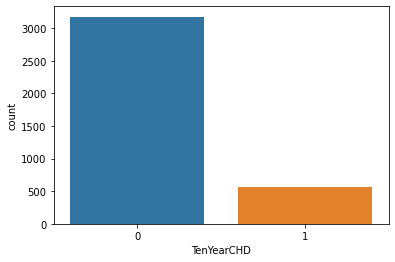

In [17]:
sns.countplot(df['TenYearCHD'],label="count")

# Checking correlation between variables

In [19]:
df.corr()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.024120,0.203861,0.326780,-0.052359,-0.002509,0.002987,0.011847,-0.067506,-0.044638,0.053602,0.074630,-0.115091,0.003236,0.096056
age,-0.024120,1.000000,-0.211427,-0.188611,0.131629,0.049990,0.305735,0.109257,0.260967,0.388558,0.205774,0.136093,-0.005857,0.118426,0.231414
currentSmoker,0.203861,-0.211427,1.000000,0.773166,-0.051828,-0.037582,-0.104753,-0.045319,-0.050025,-0.133098,-0.113915,-0.165165,0.054545,-0.054180,0.021722
cigsPerDay,0.326780,-0.188611,0.773166,1.000000,-0.046601,-0.035711,-0.066911,-0.039411,-0.030427,-0.092292,-0.056108,-0.090032,0.066726,-0.055165,0.056064
BPMeds,-0.052359,0.131629,-0.051828,-0.046601,1.000000,0.111595,0.263089,0.056322,0.089554,0.269507,0.199400,0.105090,0.010232,0.052442,0.084704
prevalentStroke,-0.002509,0.049990,-0.037582,-0.035711,0.111595,1.000000,0.065208,0.009417,0.012259,0.060431,0.055232,0.035550,-0.016675,0.015779,0.047669
prevalentHyp,0.002987,0.305735,-0.104753,-0.066911,0.263089,0.065208,1.000000,0.082096,0.165049,0.697960,0.616655,0.303382,0.142512,0.085959,0.178779
diabetes,0.011847,0.109257,-0.045319,-0.039411,0.056322,0.009417,0.082096,1.000000,0.047374,0.104415,0.051841,0.093061,0.063383,0.616084,0.093190
totChol,-0.067506,0.260967,-0.050025,-0.030427,0.089554,0.012259,0.165049,0.047374,1.000000,0.216572,0.170353,0.119398,0.094802,0.046769,0.089408
sysBP,-0.044638,0.388558,-0.133098,-0.092292,0.269507,0.060431,0.697960,0.104415,0.216572,1.000000,0.785909,0.330569,0.181482,0.132928,0.220170


# Important feature selection
#                   Find correlation between each features

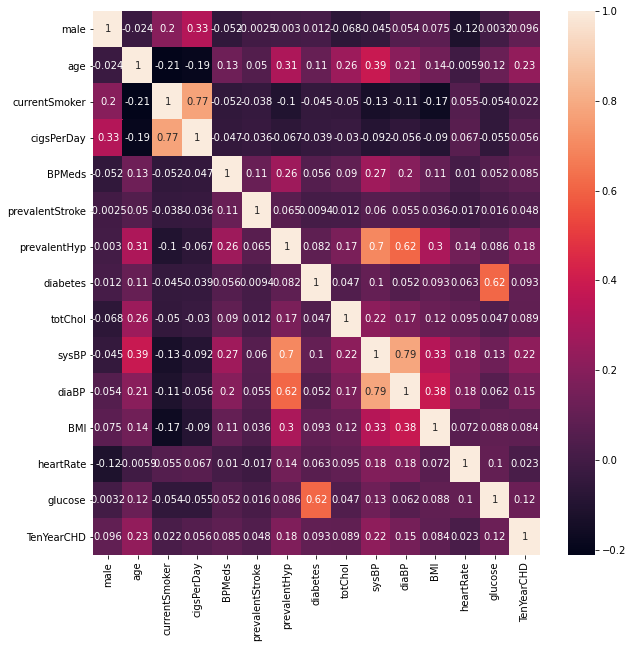

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [21]:
X=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [22]:
X.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [23]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: TenYearCHD, dtype: int64

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()

In [25]:
selection.fit(X,y)

ExtraTreesRegressor()

In [26]:
selection.feature_importances_

array([0.02073348, 0.13640724, 0.0187944 , 0.05735672, 0.01095156,
       0.00536566, 0.02701278, 0.00948827, 0.11603504, 0.12834673,
       0.12170254, 0.11385846, 0.10943621, 0.1245109 ])

In [27]:
feature = list(X.columns)
feature

['male',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

# features importance

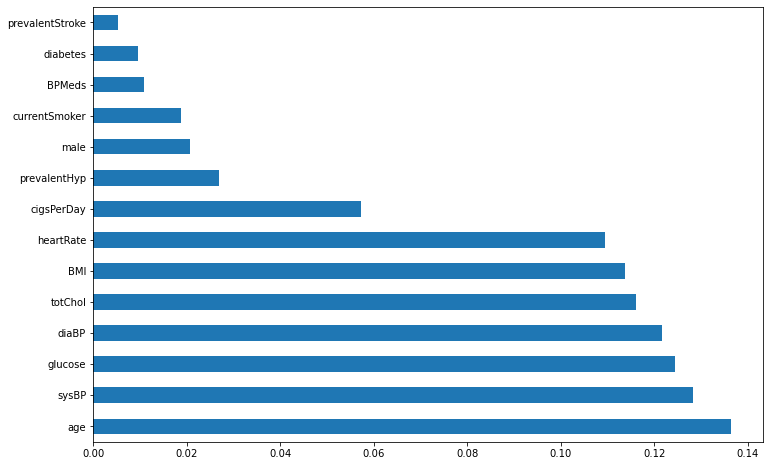

In [28]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Train-Test Split Evaluation

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=27)

In [30]:
X_train.shape

(2511, 14)

In [31]:
X_test.shape

(1238, 14)

In [32]:
y_test.shape

(1238,)

In [33]:
y_train.shape

(2511,)

# Different types of Kernels used

# Support vector machine

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [35]:
svclassifier=SVC()
svclassifier.fit(X_train,y_train)

SVC()

In [36]:
y_predict=svclassifier.predict(X_test)

In [37]:
print("Accuracy: %0.3f"%accuracy_score(y_predict,y_test))

Accuracy: 0.842


In [42]:
cm=np.array(confusion_matrix(y_test,y_predict,labels=[0,14]))
confusion=pd.DataFrame(cm, index=['have heartattck', 'healthy'],
                       columns=['predicted heartattck','predicted healthy'])
confusion

,predicted heartattck,predicted healthy
have heartattck,1042,0
healthy,0,0


In [43]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1044
           1       0.33      0.01      0.01       194

    accuracy                           0.84      1238
   macro avg       0.59      0.50      0.46      1238
weighted avg       0.76      0.84      0.77      1238



# Linear kernel

In [44]:
svclassifier2=SVC(kernel='linear')
svclassifier2.fit(X_train,y_train)

SVC(kernel='linear')

In [45]:
y_predict2=svclassifier2.predict(X_test)

In [46]:
print("Accuracy: %0.3f"%accuracy_score(y_predict2,y_test))

Accuracy: 0.843


In [79]:
cm2=np.array(confusion_matrix(y_test,y_predict2,labels=[0,14]))
confusion2=pd.DataFrame(cm2, index=['have heartattck', 'healthy'],
                       columns=['predicted heartattck','predicted healthy'])
confusion2

,predicted heartattck,predicted healthy
have heartattck,1044,0
healthy,0,0


In [48]:
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1044
           1       0.00      0.00      0.00       194

    accuracy                           0.84      1238
   macro avg       0.42      0.50      0.46      1238
weighted avg       0.71      0.84      0.77      1238



C:\Users\megha\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Polynomial kernel

In [49]:
svclassifier3=SVC(kernel='poly')
svclassifier3.fit(X_train,y_train)

SVC(kernel='poly')

In [50]:
y_predict3=svclassifier3.predict(X_test)

In [51]:
print("Accuracy: %0.3f"%accuracy_score(y_predict3,y_test))

Accuracy: 0.843


In [77]:
cm3=np.array(confusion_matrix(y_test,y_predict3,labels=[0,14]))
confusion3=pd.DataFrame(cm3, index=['have heartattck', 'healthy'],
                       columns=['predicted heartattck','predicted healthy'])
confusion3

,predicted heartattck,predicted healthy
have heartattck,1042,0
healthy,0,0


In [63]:
print(classification_report(y_test,y_predict3))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1044
           1       0.50      0.01      0.02       194

    accuracy                           0.84      1238
   macro avg       0.67      0.50      0.47      1238
weighted avg       0.79      0.84      0.77      1238



# Radial basis function kernel

In [64]:
svclassifier4=SVC(kernel='rbf')
svclassifier4.fit(X_train,y_train)

SVC()

In [65]:
y_predict4=svclassifier4.predict(X_test)

In [66]:
print("Accuracy: %0.3f"%accuracy_score(y_predict4,y_test))

Accuracy: 0.842


In [80]:
cm4=np.array(confusion_matrix(y_test,y_predict4,labels=[0,14]))
confusion4=pd.DataFrame(cm4, index=['have heartattack', 'healthy'],
                       columns=['predicted heartattack','predicted healthy'])
confusion4

,predicted heartattack,predicted healthy
have heartattack,1042,0
healthy,0,0


In [69]:
print(classification_report(y_test,y_predict4))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1044
           1       0.33      0.01      0.01       194

    accuracy                           0.84      1238
   macro avg       0.59      0.50      0.46      1238
weighted avg       0.76      0.84      0.77      1238



# Sigmoid kernel

In [70]:
svclassifier5=SVC(kernel='sigmoid')
svclassifier5.fit(X_train, y_train)

SVC(kernel='sigmoid')

In [71]:
y_predict5=svclassifier5.predict(X_test)

In [72]:
print("Accuracy: %0.3f"%accuracy_score(y_predict5,y_test))

Accuracy: 0.742


In [73]:
cm5=np.array(confusion_matrix(y_test,y_predict5,labels=[0,14]))
confusion5=pd.DataFrame(cm5, index=['have heartattack', 'healthy'],
                       columns=['predicted heartattack','predicted healthy'])
confusion5

,predicted heartattack,predicted healthy
have heartattack,911,0
healthy,0,0


In [74]:
print(classification_report(y_test,y_predict5))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1044
           1       0.05      0.04      0.04       194

    accuracy                           0.74      1238
   macro avg       0.44      0.45      0.45      1238
weighted avg       0.71      0.74      0.72      1238

